In [1]:
from data_sampler import WeightedSampler
from dataset import CARLADataset, CARLADatasetMultiProcessing
from data_preprocessing import preprocessing
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
## path_ege_data = os.path.join("..", "data", "Dataset Ege")

path_ege_data = "/Volumes/Ege_External/Town_1_2_Dataset/Training"

config = {"used_inputs": ["rgb"], 
        "used_measurements": [],    
        "seq_len": 1
        }

mean = torch.tensor([79.6657, 81.5673, 105.6161])
std = torch.tensor([66.8309, 60.1001, 66.2220])


transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


dataset = CARLADataset(root_dir=path_ege_data, config=config )
# dataset_mp = CARLADatasetMultiProcessing(root_dir=path_ege_data, config=config)
weighted_sampler = WeightedSampler(dataset=dataset)
print(dataset.__len__())
print((dataset.__getitem__(1)['rgb'].shape))




20394
(1, 3, 160, 960)


In [3]:
dl = DataLoader(dataset=dataset, batch_size=16, num_workers=0, sampler=weighted_sampler)
# dl_mp = DataLoader(dataset=dataset_mp, batch_size=16, num_workers=3, sampler=weighted_sampler)

In [ ]:
mean = torch.tensor([79.6657, 81.5673, 105.6161])
std = torch.tensor([66.8309, 60.1001, 66.2220])


transform_norm = transforms.Compose([
    transforms.Normalize(mean, std)
])


for inputs in tqdm(dl):
    inputs["rgb"] = transform_norm(inputs["rgb"])
    ## print(inputs["rgb"])
    



Text(0.5, 1.0, 'distribution of pixels')

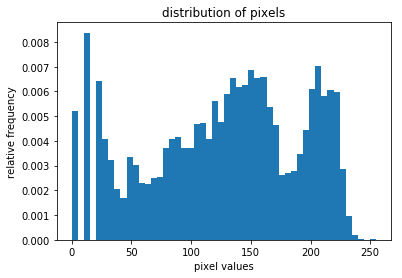

In [5]:
img_np = np.array(dataset.__getitem__(1)['rgb'])
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

Cell Below calculates the mean and std for the rbg images in the dataset. Make sure to run it only once for calculation, save the total_mean and total_std variables, and input them in the normalization step.

In [7]:
psum    = torch.tensor([0.0, 0.0, 0.0])
psum_sq = torch.tensor([0.0, 0.0, 0.0])

# loop through images
for inputs in tqdm(dl):
    psum    += inputs["rgb"].sum(axis = [0,1, 3, 4])
    psum_sq += (inputs["rgb"] ** 2).sum(axis = [0,1, 3, 4])


# pixel count
count = dataset.__len__() * 160 * 960

# mean and std
total_mean = psum / count
total_var  = (psum_sq / count) - (total_mean ** 2)
total_std  = torch.sqrt(total_var)

# output
print('mean: '  + str(total_mean))
print('std:  '  + str(total_std))

100%|██████████| 1275/1275 [13:31<00:00,  1.57it/s]

mean: tensor([ 79.6657,  81.5673, 105.6161])
std:  tensor([66.8309, 60.1001, 66.2220])
